In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 

In [2]:
df = pd.read_csv('gas_prod.csv')
df.head(3)

,Month,Gas_prod
0,1,384.261096
1,2,380.107310
2,3,392.967363


In [3]:
start_date = '2004-01' 
df['Date'] = pd.date_range(start=start_date, periods=len(df), freq='M') 

In [4]:
gas_ts = pd.Series(df.Gas_prod.values, index=df.Date, name='Gas_prod')
gas_ts.head()

Date
2004-01-31    384.261096
2004-02-29    380.107310
2004-03-31    392.967363
2004-04-30    402.114680
2004-05-31    393.519639
Name: Gas_prod, dtype: float64

## Graph

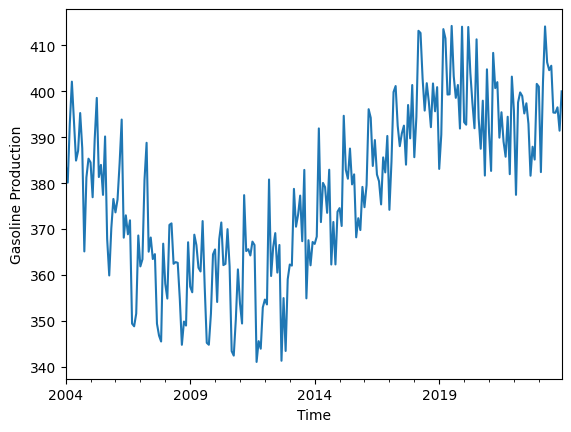

In [5]:
ax = gas_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Gasoline Production')
plt.show(ax)

## Regression

In [6]:
nValid = 36
nTrain = len(gas_ts) - nValid
train_ts = gas_ts[:nTrain]
valid_ts = gas_ts[nTrain:]

In [7]:
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
ts_df = tsatools.add_trend(gas_ts,trend='ct')  # "ct" adds both constant and trend
ts_df['Month']=ts_df.index.month

# display updated ts_df
ts_df.head()

,Gas_prod,const,trend,Month
Date,,,,
2004-01-31,384.261096,1.0,1.0,1
2004-02-29,380.107310,1.0,2.0,2
2004-03-31,392.967363,1.0,3.0,3
2004-04-30,402.114680,1.0,4.0,4
2004-05-31,393.519639,1.0,5.0,5


In [8]:
nValid = 36
nTrain = len(gas_ts) - nValid
train_df = ts_df[:nTrain]
valid_df = ts_df[nTrain:]

#### Linear Trend

In [9]:
gas_lm = sm.ols(formula='Gas_prod ~ trend',data=train_df).fit()

gas_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Gas_prod   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     70.15
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           9.15e-15
Time:                        11:55:57   Log-Likelihood:                -845.41
No. Observations:                 204   AIC:                             1695.
Df Residuals:                     202   BIC:                             1701.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    360.1673      2.155    167.108      0.000     355.918     364.417
trend          0.1527      0.018      8.376      0.000       0.117       0.189
==============================================================================
Omnibus:                        2.009   Durbin-Watson:                   0.545
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                1.957
Skew:                           0.169   Prob(JB):                        0.376
Kurtosis:                       2.660   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
from dmba import regressionSummary
predict_lm = gas_lm.predict(valid_df)
regressionSummary(valid_ts,predict_lm)


Regression statistics

                      Mean Error (ME) : 1.1510
       Root Mean Squared Error (RMSE) : 8.2360
            Mean Absolute Error (MAE) : 6.7058
          Mean Percentage Error (MPE) : 0.2482
Mean Absolute Percentage Error (MAPE) : 1.6962


#### Seasonality

In [11]:
rider_lm_season = sm.ols(formula='Gas_prod~C(Month)',data=train_df).fit()
rider_lm_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Gas_prod   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     3.781
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           6.41e-05
Time:                        11:55:59   Log-Likelihood:                -855.82
No. Observations:                 204   AIC:                             1736.
Df Residuals:                     192   BIC:                             1775.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        371.0753      4.015     92.431      0.000     363.157     378.994
C(Month)[T.2]     -0.0141      5.678     -0.002      0.998     -11.212      11.184
C(Month)[T.3]     18.0605      5.678      3.181      0.002       6.862      29.259
C(Month)[T.4]     15.1649      5.678      2.671      0.008       3.967      26.363
C(Month)[T.5]      7.4953      5.678      1.320      0.188      -3.703      18.694
C(Month)[T.6]      7.6185      5.678      1.342      0.181      -3.580      18.817
C(Month)[T.7]      8.3115      5.678      1.464      0.145      -2.887      19.510
C(Month)[T.8]      8.0284      5.678      1.414      0.159      -3.170      19.227
C(Month)[T.9]     -6.7881      5.678     -1.196      0.233     -17.987       4.410
C(Month)[T.10]    -3.2364      5.678     -0.570      0.569     -14.435       7.962
C(Month)[T.11]    -5.0732      5.678     -0.894      0.373     -16.272       6.125
C(Month)[T.12]     7.3717      5.678      1.298      0.196      -3.827      18.570
==============================================================================
Omnibus:                       35.363   Durbin-Watson:                   0.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.109
Skew:                           0.343   Prob(JB):                      0.00235
Kurtosis:                       2.024   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
predict_lm_season = rider_lm_season.predict(valid_df)
regressionSummary(valid_ts, predict_lm_season)


Regression statistics

                      Mean Error (ME) : 19.4764
       Root Mean Squared Error (RMSE) : 20.5194
            Mean Absolute Error (MAE) : 19.4764
          Mean Percentage Error (MPE) : 4.9112
Mean Absolute Percentage Error (MAPE) : 4.9112


#### Quadratic trend and seasonality

In [13]:
modelfomula = 'Gas_prod ~ trend + np.square(trend) + C(Month)'
rider_lm_trendseason = sm.ols(formula=modelfomula, data=train_df).fit()
rider_lm_trendseason.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Gas_prod   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     68.90
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.35e-64
Time:                        11:55:59   Log-Likelihood:                -698.03
No. Observations:                 204   AIC:                             1424.
Df Residuals:                     190   BIC:                             1471.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          380.6398      2.395    158.952      0.000     375.916     385.363
C(Month)[T.2]       -0.1348      2.633     -0.051      0.959      -5.329       5.060
C(Month)[T.3]       17.8120      2.634      6.764      0.000      12.617      23.007
C(Month)[T.4]       14.7816      2.634      5.613      0.000       9.587      19.977
C(Month)[T.5]        6.9702      2.634      2.647      0.009       1.775      12.165
C(Month)[T.6]        6.9445      2.634      2.637      0.009       1.749      12.140
C(Month)[T.7]        7.4816      2.634      2.840      0.005       2.286      12.677
C(Month)[T.8]        7.0355      2.634      2.671      0.008       1.839      12.232
C(Month)[T.9]       -7.9509      2.634     -3.018      0.003     -13.148      -2.754
C(Month)[T.10]      -4.5763      2.635     -1.737      0.084      -9.773       0.621
C(Month)[T.11]      -6.5971      2.635     -2.504      0.013     -11.795      -1.399
C(Month)[T.12]       5.6568      2.635      2.146      0.033       0.458      10.855
trend               -0.5650      0.037    -15.401      0.000      -0.637      -0.493
np.square(trend)     0.0035      0.000     20.291      0.000       0.003       0.004
==============================================================================
Omnibus:                        1.515   Durbin-Watson:                   1.060
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.321
Skew:                          -0.196   Prob(JB):                        0.517
Kurtosis:                       3.050   Cond. No.                     2.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
predict_lm_trendseason = rider_lm_trendseason.predict(valid_df)
regressionSummary(valid_ts,predict_lm_trendseason)


Regression statistics

                      Mean Error (ME) : -38.0559
       Root Mean Squared Error (RMSE) : 39.1968
            Mean Absolute Error (MAE) : 38.0559
          Mean Percentage Error (MPE) : -9.6359
Mean Absolute Percentage Error (MAPE) : 9.6359


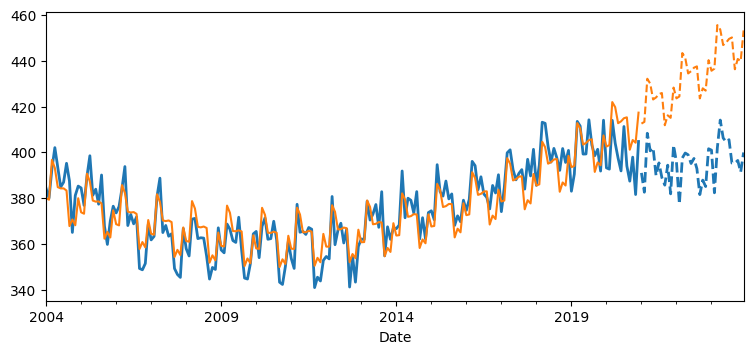

In [15]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,3.75))
train_df.plot(y='Gas_prod',ax=ax,color='C0',linewidth=2)
valid_df.plot(y='Gas_prod',ax=ax,color='C0',linewidth=2, linestyle='dashed')
rider_lm_trendseason.predict(train_df).plot(color='C1')
rider_lm_trendseason.predict(valid_df).plot(color='C1',linestyle='dashed')
ax.get_legend().remove()
plt.show()

## Simple Moving Average of 12 Months

In [16]:
# Using pandas to compute the Simple Moving Average (SMA) with a window of 12 months
df['SMA_6'] = df['Gas_prod'].rolling(window=6).mean()

# Using pandas to compute Exponential Smoothing (ES); here we use a common smoothing factor alpha = 0.2
df['ES_0.2'] = df['Gas_prod'].ewm(alpha=0.2, adjust=False).mean()

# Show the dataset with the new SMA and ES columns
df[['Gas_prod', 'SMA_6', 'ES_0.2']].tail()  # Displaying 15 rows to see some of the moving averages starting to form

,Gas_prod,SMA_6,ES_0.2
235,395.379147,404.673264,400.340140
236,395.330980,403.563036,399.338308
237,396.520100,400.625618,398.774667
238,391.428054,398.141716,397.305344
239,400.000000,397.373326,397.844275


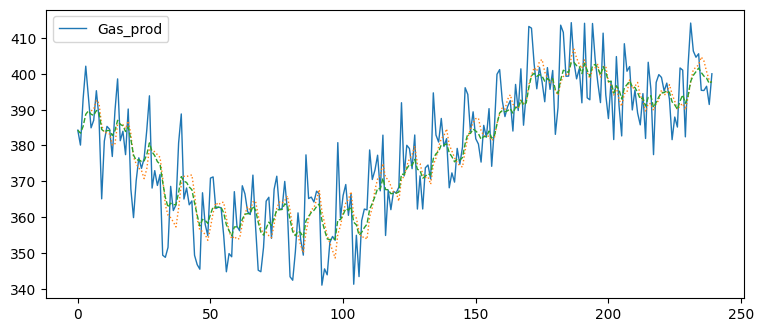

In [17]:
# Visualize the moving average forecast
x = df["SMA_6"].dropna()
y = df["ES_0.2"]

# Blue line for x
# Orange line for y
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,3.75))
df.plot(y='Gas_prod', ax=ax,color='C0', linewidth=1)
x.plot(y='SMA_6',ax=ax,color='C1',linewidth=1, linestyle='dotted')
y.plot(y='ES_0.2',ax=ax,color='C2',linewidth=1, linestyle='dashed')
plt.show()

## Forecasting Model using SARIMA

In [22]:
gas_ts_log = np.log10(gas_ts)
nValid = 36
nTrain = len(gas_ts_log) - nValid
train_ts = gas_ts_log[:nTrain]
valid_ts = gas_ts_log[nTrain:]

In [23]:
# Test a SARIMA model
import statsmodels.api as sm
temp_model = sm.tsa.statespace.SARIMAX(train_ts,
                                       order=(1,1,1),
                                       seasonal_order=(1,0,1,12),
                                       enforce_stationarity=True,
                                       enforce_invertibility=True)
results = temp_model.fit()
print(results.summary())

c:\Users\mjelr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\mjelr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                           Gas_prod   No. Observations:                  204
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 750.041
Date:                            Mon, 22 Apr 2024   AIC                          -1490.081
Time:                                    12:03:25   BIC                          -1473.515
Sample:                                01-31-2004   HQIC                         -1483.379
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0086      0.109     -0.079      0.937      -0.223       0.206
ma.L1         -0.7017      0.072   

In [24]:
# forecast with the fitted model
pred = results.get_forecast(steps=36,alpha=0.05)

# Get the forecasted values
forecasted_values = pred.predicted_mean

# Get the confidence intervals for the forecasted values
confidence_intervals = pred.conf_int()

# Print the forecasted values
print("Forecasted values:")
print(forecasted_values)

# Print the confidence intervals
print("\n95% confidence intervals:")
print(confidence_intervals)

Forecasted values:
2021-01-31    2.588064
2021-02-28    2.587298
2021-03-31    2.607059
2021-04-30    2.597706
2021-05-31    2.591707
2021-06-30    2.586273
2021-07-31    2.604507
2021-08-31    2.588294
2021-09-30    2.581861
2021-10-31    2.592098
2021-11-30    2.576188
2021-12-31    2.598320
2022-01-31    2.581832
2022-02-28    2.581173
2022-03-31    2.598172
2022-04-30    2.590126
2022-05-31    2.584966
2022-06-30    2.580292
2022-07-31    2.595977
2022-08-31    2.582030
2022-09-30    2.576496
2022-10-31    2.585302
2022-11-30    2.571616
2022-12-31    2.590654
2023-01-31    2.576471
2023-02-28    2.575904
2023-03-31    2.590527
2023-04-30    2.583606
2023-05-31    2.579167
2023-06-30    2.575146
2023-07-31    2.588639
2023-08-31    2.576641
2023-09-30    2.571881
2023-10-31    2.579456
2023-11-30    2.567683
2023-12-31    2.584060
Freq: M, Name: predicted_mean, dtype: float64

95% confidence intervals:
            lower Gas_prod  upper Gas_prod
2021-01-31        2.576772        2.5

c:\Users\mjelr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [25]:
from dmba import regressionSummary
regressionSummary(np.power(10,valid_ts), 
                  np.power(10,pred.predicted_mean))


Regression statistics

                      Mean Error (ME) : 10.4432
       Root Mean Squared Error (RMSE) : 13.9149
            Mean Absolute Error (MAE) : 11.2523
          Mean Percentage Error (MPE) : 2.6145
Mean Absolute Percentage Error (MAPE) : 2.8235


In [27]:
pred = results.get_forecast(steps=36,alpha=0.05)

# Get the forecasted values
forecasted_values = pred.predicted_mean

# Get the confidence intervals for the forecasted values
confidence_intervals = pred.conf_int()

# Print the forecasted values
print("Forecasted values:")
print(forecasted_values)

# Print the confidence intervals
print("\n95% confidence intervals:")
print(confidence_intervals)

Forecasted values:
2021-01-31    2.588064
2021-02-28    2.587298
2021-03-31    2.607059
2021-04-30    2.597706
2021-05-31    2.591707
2021-06-30    2.586273
2021-07-31    2.604507
2021-08-31    2.588294
2021-09-30    2.581861
2021-10-31    2.592098
2021-11-30    2.576188
2021-12-31    2.598320
2022-01-31    2.581832
2022-02-28    2.581173
2022-03-31    2.598172
2022-04-30    2.590126
2022-05-31    2.584966
2022-06-30    2.580292
2022-07-31    2.595977
2022-08-31    2.582030
2022-09-30    2.576496
2022-10-31    2.585302
2022-11-30    2.571616
2022-12-31    2.590654
2023-01-31    2.576471
2023-02-28    2.575904
2023-03-31    2.590527
2023-04-30    2.583606
2023-05-31    2.579167
2023-06-30    2.575146
2023-07-31    2.588639
2023-08-31    2.576641
2023-09-30    2.571881
2023-10-31    2.579456
2023-11-30    2.567683
2023-12-31    2.584060
Freq: M, Name: predicted_mean, dtype: float64

95% confidence intervals:
            lower Gas_prod  upper Gas_prod
2021-01-31        2.576772        2.5

c:\Users\mjelr\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
